# Loan Status Predictor

In [1]:
# pip install imblearn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# 1. DATA COLLECTION

In [3]:
df = pd.read_csv("data/bankloan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 2. DATA CLEANING

In [4]:
df.shape

(614, 13)

In [5]:
df.drop(["Loan_ID"], axis = 1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null float64
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [9]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
# Filling NANs in Categorical variables
df["Gender"].fillna("Female", inplace = True)  
df["Married"].fillna("No", inplace=True)
df["Self_Employed"].fillna("Yes", inplace=True)

In [12]:
# Filling NaNs in Numerical variables
df["Dependents"].fillna(df.Dependents.median(), inplace=True)
df["LoanAmount"].fillna(df.LoanAmount.median(), inplace=True)
df["Loan_Amount_Term"].fillna(df.Loan_Amount_Term.median(), inplace=True)
df["Credit_History"].fillna(df.Credit_History.median(), inplace=True)

In [13]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df["Dependents"] = df["Dependents"].astype(int)
df["Credit_History"] = df["Credit_History"].astype(int)

In [15]:
df.dtypes

Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
# Checking for duplicates
duplicates_df = df[df.duplicated()]
duplicates_df.shape

(0, 12)

In [17]:
df.shape

(614, 12)

# 3. EXPLORATORY DATA ANALYSIS

# 3.1. NUMERICAL FEATURES

In [18]:
df_num = df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]]

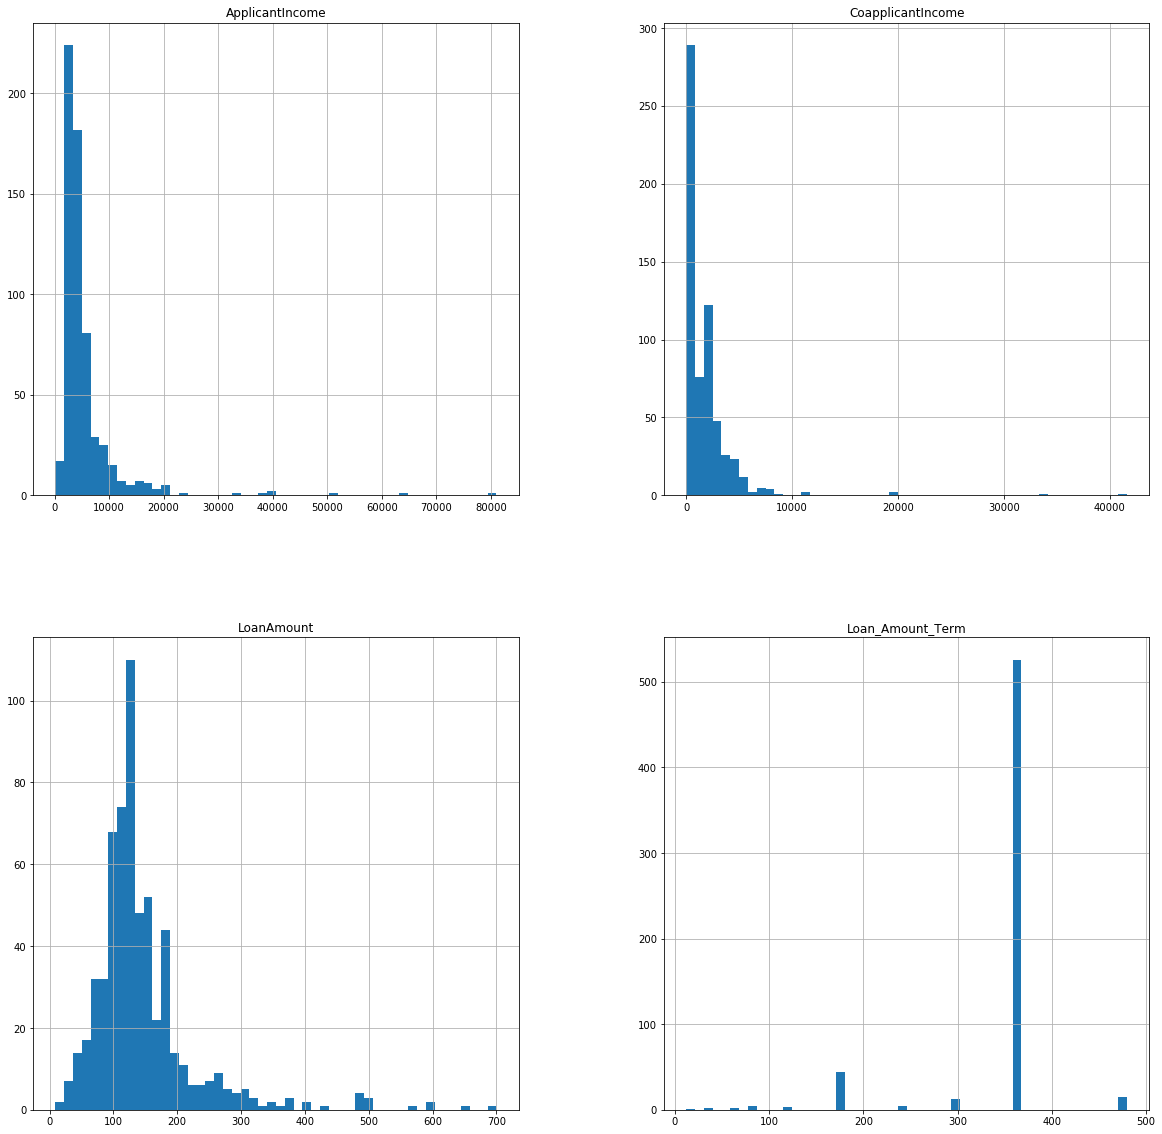

In [19]:
df_num.hist(figsize=(20,20), bins=50);

### 3.1.1. Loan Amount

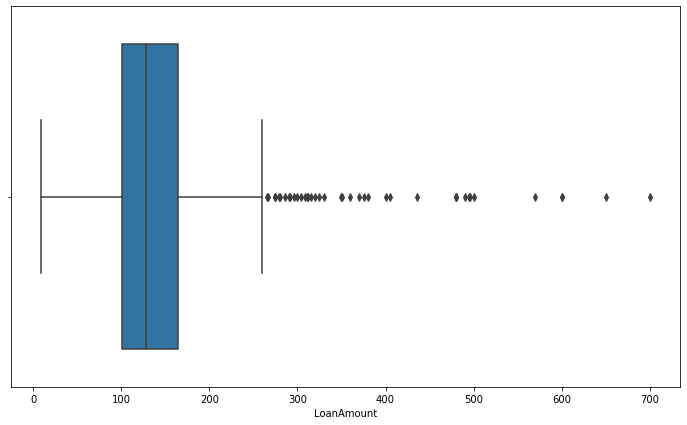

In [20]:
plt.figure(figsize=(12,7))

sns.boxplot(df["LoanAmount"])

plt.show()

**OBSERVATION**:
- The data is skewed to the right.
- Q1 is 100.
- Maximum value is 700.

### 3.1.2. Applicant Income

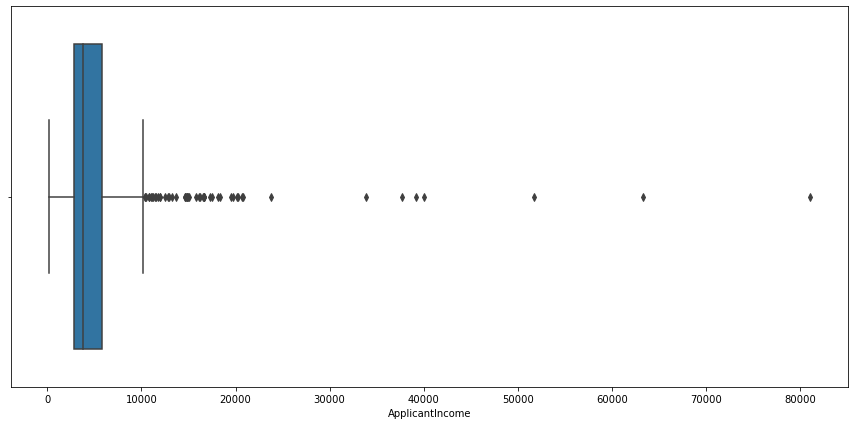

In [21]:
plt.figure(figsize=(15,7))

sns.boxplot(df["ApplicantIncome"])

plt.show()

**OBSERVATION**:
- The data is skewed to the right.
-  Minimum value is 0.

### 3.1.3. Applicant Income vs Loan Amount

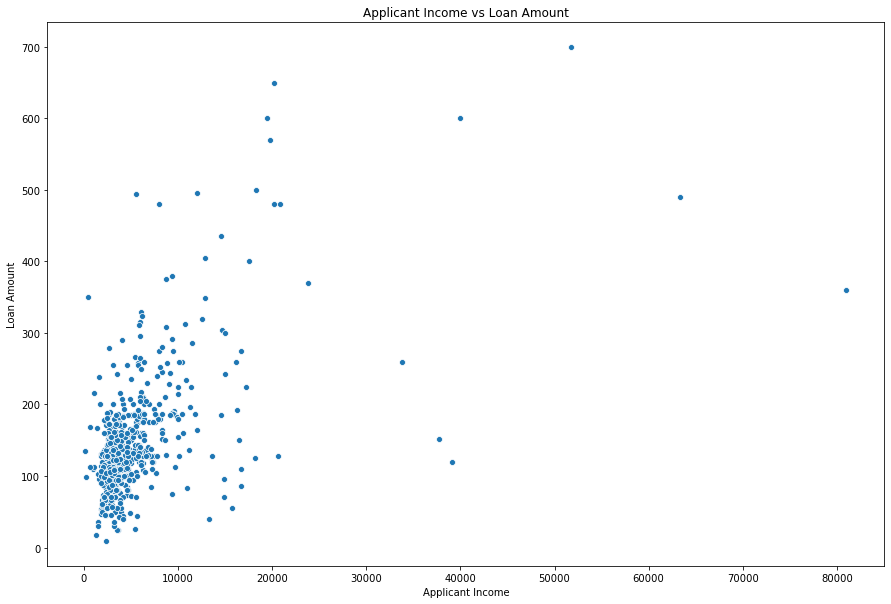

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df)
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Applicant Income vs Loan Amount")
plt.show()

### 3.1.4. Correlation

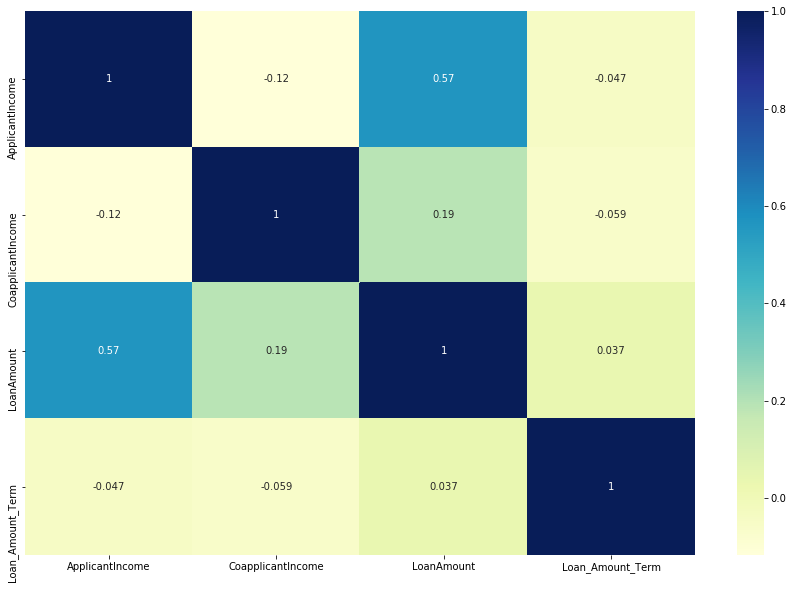

In [23]:
plt.figure(figsize=(15,10))

sns.heatmap(df_num.corr(), annot=True, cmap="YlGnBu");

**OBSERVATION**:
- **Applicant Income** and **Loan Amount** have a positive correlation.

## 3.2. CATEGORICAL FEATURES

### 3.2.1. GENDER

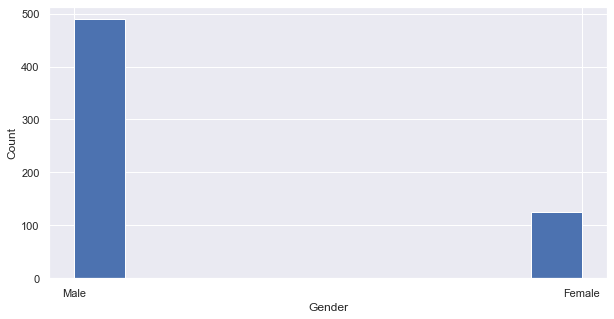

In [24]:
plt.figure(figsize=(10,5))
sns.set()
plt.hist(df.Gender)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### 3.2.2. MARRIED

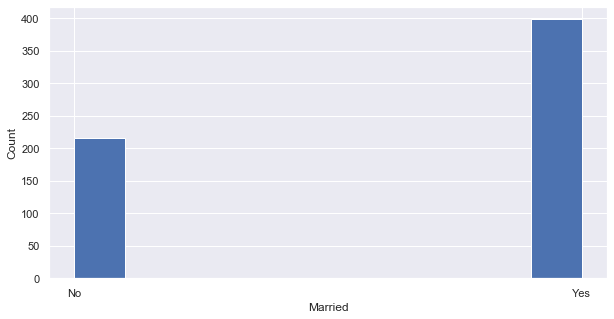

In [25]:
plt.figure(figsize=(10,5))
sns.set()
plt.hist(df.Married)
plt.xlabel("Married")
plt.ylabel("Count")
plt.show()

### 3.2.3. EDUCATION

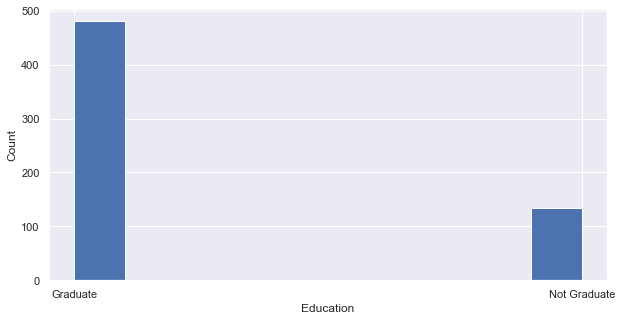

In [26]:
plt.figure(figsize=(10,5))
sns.set()
plt.hist(df.Education)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

### 3.2.4. SELF-EMPLOYED

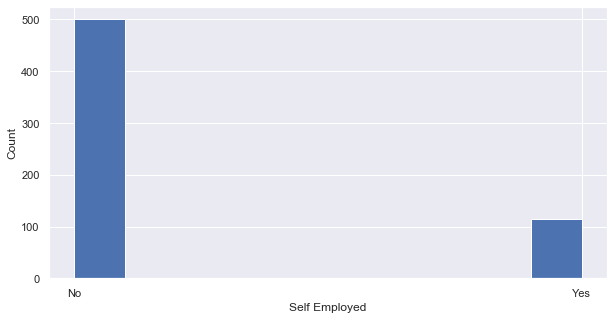

In [27]:
plt.figure(figsize=(10,5))
sns.set()
plt.hist(df.Self_Employed)
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.show()

### 3.2.5. PROPERY AREA

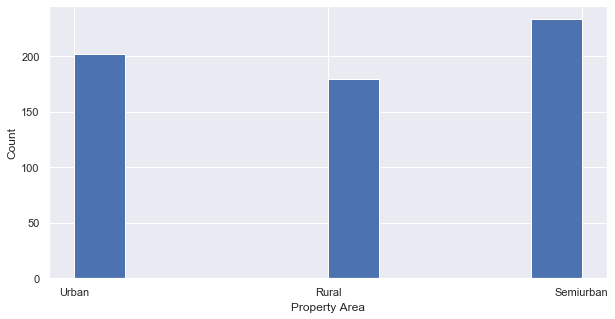

In [28]:
plt.figure(figsize=(10,5))
plt.hist(df.Property_Area)
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.show()

### 3.2.6. DEPENDENTS

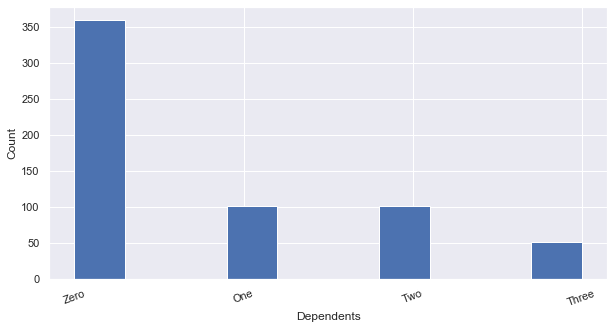

In [29]:
plt.figure(figsize=(10,5))
sns.set()
plt.hist(df.Dependents)
plt.xlabel("Dependents")
plt.ylabel("Count")

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 1, step=0.2))  # Set label locations.
plt.xticks([0, 1, 2, 3], ['Zero', 'One', 'Two', 'Three'], rotation=20)  # Set text labels and properties.

plt.show()

### 3.2.7. CREDIT HISTORY

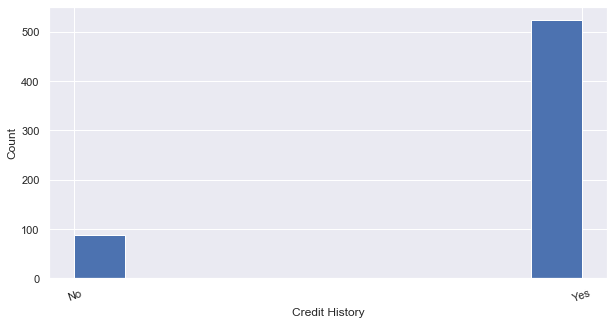

In [30]:
plt.figure(figsize=(10,5))
sns.set()
plt.hist(df.Credit_History)
plt.xlabel("Credit History")
plt.ylabel("Count")

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 1, step=0.2))  # Set label locations.
plt.xticks([0, 1], ['No', 'Yes'], rotation=20)  # Set text labels and properties.


plt.show()

### 3.2.8. LOAN STATUS

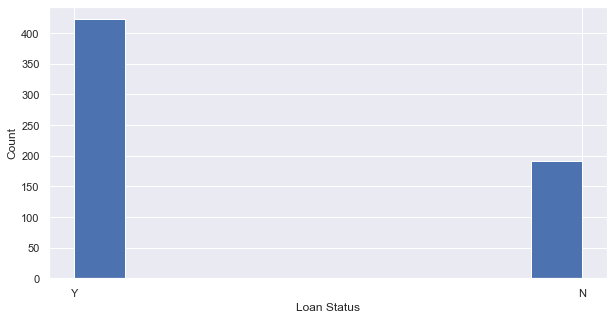

In [31]:
plt.figure(figsize=(10,5))
sns.set()
plt.hist(df.Loan_Status)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [32]:
# Convert Categorical Features to Numeric
le = LabelEncoder()

# Apply le on categorical feature columns
df[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']] = df[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']].apply(lambda col: le.fit_transform(col))

# 4. BUILDING MODEL

## 4.1. Analysing Imbalanced Dataset

In [33]:
df.shape

(614, 12)

In [34]:
loan_status = pd.value_counts(df["Loan_Status"], sort=True).sort_index()
print(loan_status)

0    192
1    422
Name: Loan_Status, dtype: int64


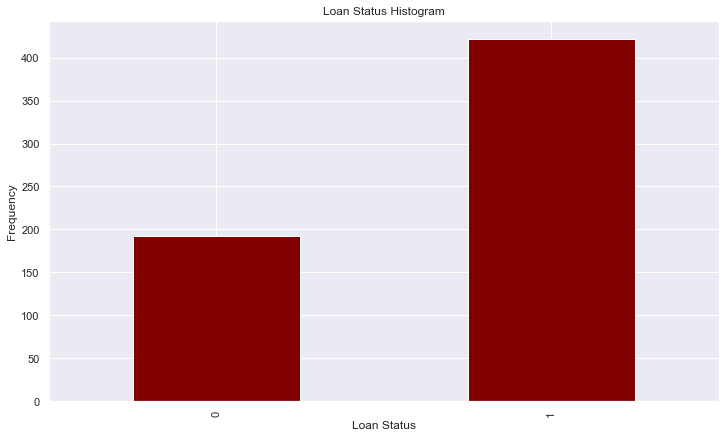

In [35]:
loan_status.plot(kind="bar", figsize=(12,7), color="maroon")
plt.title("Loan Status Histogram")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.show()

In [36]:
yes_status = len(df[df["Loan_Status"] == 1])
no_status = len(df[df["Loan_Status"] == 0])
total_status = yes_status + no_status

In [37]:
print("Loan Approved:", yes_status)
print("Loan Not Approved:", no_status)
print("Total Loan Applications:", total_status)

Loan Approved: 422
Loan Not Approved: 192
Total Loan Applications: 614


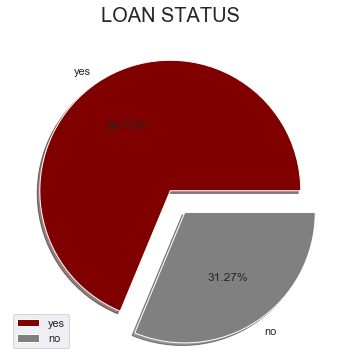

In [38]:
plt.figure(figsize=(12,6))
size = [422,192]
labels = ['yes', 'no']
colors = ['maroon', 'grey']
explode = [0, 0.2]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('LOAN STATUS', fontsize = 20)
plt.legend()
plt.show() 

## 4.2. Undersampling

In [39]:
# Creating an undersampler object
rus = RandomUnderSampler(random_state=2)

In [40]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [41]:
# Resample the features for training data and the target
X_sampled, y_sampled = rus.fit_sample(X,y)

In [42]:
# Revert resampled data into dataframe
X_sampled = pd.DataFrame(X_sampled)
y_sampled = pd.DataFrame(y_sampled)

In [43]:
X_sampled.shape

(384, 11)

In [44]:
y_sampled.shape

(384, 1)

In [45]:
undersampled_df = pd.concat([X_sampled, y_sampled], axis=1)

In [46]:
undersampled_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
1,1,1,3,0,0,3036,2504.0,158.0,360.0,0,1,0
2,1,1,1,0,0,12841,10968.0,349.0,360.0,1,1,0
3,1,0,0,0,0,1853,2840.0,114.0,360.0,1,0,0
4,0,0,0,0,0,3510,0.0,76.0,360.0,0,2,0


In [47]:
undersampled_df.shape

(384, 12)

## 4.3. Data After Undersampling

In [48]:
loan_status_sampled = pd.value_counts(undersampled_df["Loan_Status"], sort=True).sort_index()
print(loan_status_sampled)

0    192
1    192
Name: Loan_Status, dtype: int64


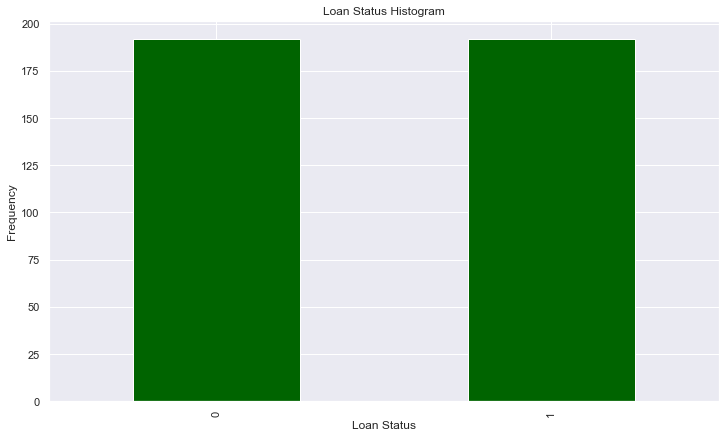

In [49]:
loan_status_sampled.plot(kind="bar", figsize=(12,7), color="darkgreen")
plt.title("Loan Status Histogram")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.show()

In [50]:
yes_status = len(undersampled_df[undersampled_df["Loan_Status"] == 1])
no_status = len(undersampled_df[undersampled_df["Loan_Status"] == 0])
total_status = yes_status + no_status

In [51]:
print("Loan Approved:", yes_status)
print("Loan Not Approved:", no_status)
print("Total Loan Applications:", total_status)

Loan Approved: 192
Loan Not Approved: 192
Total Loan Applications: 384


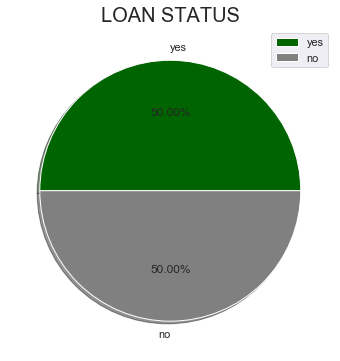

In [52]:
plt.figure(figsize=(12,6))
size = [192,192]
labels = ['yes', 'no']
colors = ['darkgreen', 'grey']
# explode = [0, 0.2]

plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('LOAN STATUS', fontsize = 20)
plt.legend()
plt.show() 

In [53]:
X = undersampled_df.drop("Loan_Status", axis=1)
y = undersampled_df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2)

## 4.4. Machine Learning Algorithms

### 4.4.1. Random Forest Classifier

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred_rf = rf.predict(X_test)

### 4.4.2. KNN

In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred_knn = knn.predict(X_test)

### 4.4.3. Decision Tree

In [58]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
y_pred_dt = dt.predict(X_test)

### 4.4.4. SVC

In [60]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [61]:
y_pred_svc = svc.predict(X_test)

### 4.4.5 GaussianNB

In [62]:
gn = GaussianNB()
gn.fit(X_train, y_train)

GaussianNB()

In [63]:
y_pred_gn = gn.predict(X_test)

## ACCURACY SCORE

In [64]:
scores = {}

In [65]:
acc_rf = accuracy_score(y_test, y_pred_rf)
scores['Random Forest'] = acc_rf
acc_knn = accuracy_score(y_test, y_pred_knn)
scores['KNN'] = acc_knn
acc_dt = accuracy_score(y_test, y_pred_dt)
scores['Decision Tree'] = acc_dt
acc_svc = accuracy_score(y_test, y_pred_svc)
scores['SVC'] = acc_svc
acc_gn = accuracy_score(y_test, y_pred_gn)
scores['GaussianNB'] = acc_gn
print(acc_rf, acc_knn, acc_dt, acc_svc, acc_gn)

0.6493506493506493 0.5064935064935064 0.5714285714285714 0.4675324675324675 0.6753246753246753


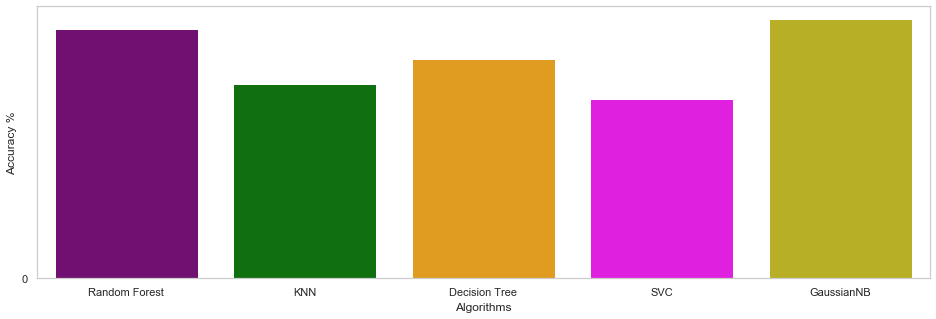

In [66]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette=colors)
plt.show()

## CLASSIFICATION REPORT

In [67]:
# Random Forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62        40
           1       0.61      0.76      0.67        37

    accuracy                           0.65        77
   macro avg       0.66      0.65      0.65        77
weighted avg       0.66      0.65      0.65        77



In [68]:
# KNN
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.53      0.40      0.46        40
           1       0.49      0.62      0.55        37

    accuracy                           0.51        77
   macro avg       0.51      0.51      0.50        77
weighted avg       0.51      0.51      0.50        77



In [69]:
# Decision Tree
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.61      0.47      0.54        40
           1       0.54      0.68      0.60        37

    accuracy                           0.57        77
   macro avg       0.58      0.58      0.57        77
weighted avg       0.58      0.57      0.57        77



In [70]:
# SVC
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.49      0.45      0.47        40
           1       0.45      0.49      0.47        37

    accuracy                           0.47        77
   macro avg       0.47      0.47      0.47        77
weighted avg       0.47      0.47      0.47        77



In [71]:
# GaussianNB
print(classification_report(y_test, y_pred_gn ))

              precision    recall  f1-score   support

           0       0.86      0.45      0.59        40
           1       0.61      0.92      0.73        37

    accuracy                           0.68        77
   macro avg       0.73      0.68      0.66        77
weighted avg       0.74      0.68      0.66        77



## CONFUSION MATRIX

In [72]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_svc = confusion_matrix(y_test,y_pred_svc)
cm_gn = confusion_matrix(y_test,y_pred_gn)

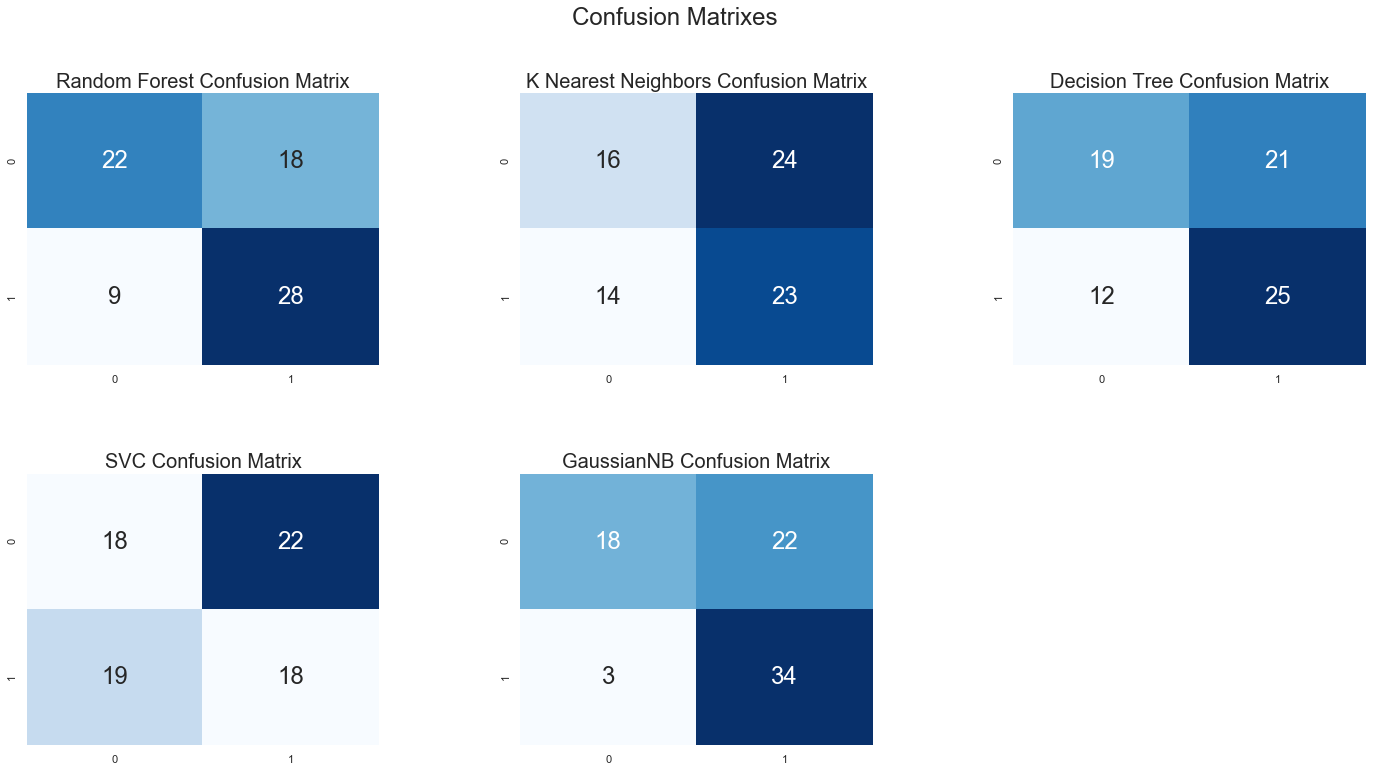

In [73]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Random Forest Confusion Matrix", fontsize=20)
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix", fontsize=20)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,3,3)
plt.title("Decision Tree Confusion Matrix", fontsize=20)
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("SVC Confusion Matrix", fontsize=20)
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("GaussianNB Confusion Matrix", fontsize=20)
sns.heatmap(cm_gn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});


## ROC CURVE